In [38]:
!pip install imblearn
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from random import seed
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import EditedNearestNeighbours


amzn_data = pd.read_csv('amzn_data.csv',sep=",")
amzn_data['Date'] = pd.to_datetime(amzn_data['Date'])
amzn_data = amzn_data[amzn_data['Date']>='2012-01-01']

nflx_data = pd.read_csv('googl_data.csv',sep=",")
nflx_data['Date'] = pd.to_datetime(nflx_data['Date'])
nflx_data = nflx_data[nflx_data['Date']>='2012-01-01']
nflx_data = nflx_data[::-1]

In [39]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [40]:
import datetime
from math import pi
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
#amzn
amzn_data['Adj. Open'] = amzn_data['Adj. Open'].astype(float)
amzn_data['Adj. Close'] = amzn_data['Adj. Close'].astype(float)
amzn_data['Adj. High'] = amzn_data['Adj. High'].astype(float)
amzn_data['Adj. Low'] = amzn_data['Adj. Low'].astype(float)
amzn_data.Volume = amzn_data.Volume.astype(int)
amzn_inc = amzn_data['Adj. Close'] > amzn_data['Adj. Open']
amzn_dec = amzn_data['Adj. Open'] > amzn_data['Adj. Close']
w = 12 * 60 * 60 * 1000

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"
p_amzn = figure(x_axis_type = "datetime", tools = TOOLS, plot_width = 1000, title = "Amazon stock")
p_amzn.xaxis.major_label_orientation = pi/4
p_amzn.grid.grid_line_alpha = 0.3

p_amzn.segment(amzn_data.Date, amzn_data['Adj. High'], amzn_data.Date, amzn_data['Adj. Low'], color = 'black')
p_amzn.vbar(amzn_data.Date[amzn_inc], w, amzn_data['Adj. Open'][amzn_inc], amzn_data['Adj. Close'][amzn_inc], fill_color = '#F2583E', line_color = "black")
p_amzn.vbar(amzn_data.Date[amzn_dec], w, amzn_data['Adj. Open'][amzn_dec], amzn_data['Adj. Close'][amzn_dec], fill_color = '#D5E1DD', line_color = "black")
amzn_data

#googl
nflx_data['Adj. Open'] = nflx_data['Adj. Open'].astype(float)
nflx_data['Adj. Close'] = nflx_data['Adj. Close'].astype(float)
nflx_data['Adj. High'] = nflx_data['Adj. High'].astype(float)
nflx_data['Adj. Low'] = nflx_data['Adj. Low'].astype(float)
nflx_data.Volume = nflx_data.Volume.astype(int)
nflx_inc = nflx_data['Adj. Close'] > nflx_data['Adj. Open']
nflx_dec = nflx_data['Adj. Open'] > nflx_data['Adj. Close']

p_nflx = figure(x_axis_type = "datetime", tools = TOOLS, plot_width = 1000, title = "Netflix stock")
p_nflx.xaxis.major_label_orientation = pi/4
p_nflx.grid.grid_line_alpha = 0.3

p_nflx.segment(nflx_data.Date, nflx_data['Adj. High'], nflx_data.Date, nflx_data['Adj. Low'], color = 'black')
p_nflx.vbar(nflx_data.Date[nflx_inc], w, nflx_data['Adj. Open'][nflx_inc], nflx_data['Adj. Close'][nflx_inc], fill_color = '#D5E1DD', line_color = "black")
p_nflx.vbar(nflx_data.Date[nflx_dec], w, nflx_data['Adj. Open'][nflx_dec], nflx_data['Adj. Close'][nflx_dec], fill_color = '#F2583E', line_color = "black")
nflx_data


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1566,2012-01-03,652.94,668.15,652.37,665.41,7345600,0.0,1.0,327.480902,335.109451,327.195020,333.735209,7345600.0
1565,2012-01-04,665.03,670.25,660.62,668.28,5722200,0.0,1.0,333.544620,336.162702,331.332793,335.174652,5722200.0
1564,2012-01-05,662.13,663.97,656.23,659.01,6559200,0.0,1.0,332.090130,333.012979,329.130996,330.525300,6559200.0
1563,2012-01-06,659.15,660.00,649.79,650.02,5380400,0.0,1.0,330.595517,331.021833,325.901025,326.016381,5380400.0
1562,2012-01-09,646.50,647.00,621.23,622.46,11633500,0.0,1.0,324.250932,324.501706,311.576808,312.193712,11633500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2018-03-21,1092.57,1108.70,1087.21,1094.00,1990515,0.0,1.0,1092.570000,1108.700000,1087.210000,1094.000000,1990515.0
3,2018-03-22,1080.01,1083.92,1049.64,1053.15,3418154,0.0,1.0,1080.010000,1083.920000,1049.640000,1053.150000,3418154.0
2,2018-03-23,1051.37,1066.78,1024.87,1026.55,2413517,0.0,1.0,1051.370000,1066.780000,1024.870000,1026.550000,2413517.0
1,2018-03-26,1050.60,1059.27,1010.58,1054.09,3272409,0.0,1.0,1050.600000,1059.270000,1010.580000,1054.090000,3272409.0


In [41]:
output_notebook()

Loading BokehJS ...

In [42]:
output_file("stock_information.html", title = "Amazon Stock")

show(p_amzn)

In [43]:
output_file("stock_information.html", title = "Netflix Stock")

show(p_nflx)

Long Short Turn Memory model

In [44]:
nflx_data
new_data_set = nflx_data[['Date','Adj. Close']]
new_data_set.index = nflx_data.Date
new_data_set.drop('Date', axis = 1, inplace = True)
new_data_set

E:\Anaconda\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Adj. Close
Date,
2012-01-03,333.735209
2012-01-04,335.174652
2012-01-05,330.525300
2012-01-06,326.016381
2012-01-09,312.193712
...,...
2018-03-21,1094.000000
2018-03-22,1053.150000
2018-03-23,1026.550000


In [45]:
#!pip install tensorflow
#!pip install keras
import tensorflow as tf
from datetime import datetime, date
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [46]:
new_dataset = new_data_set.values

train_dataset = new_data_set[new_data_set.index < '2017-01-01']
test_dataset = new_data_set[new_data_set.index >= '2017-01-01']

train = train_dataset.values
test = test_dataset.values

type(train)

numpy.ndarray

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
new_dataset = new_dataset.reshape(-1,1)
scaled_data = scaler.fit_transform(new_dataset)

In [48]:
scaled_data

array([[0.05880342],
       [0.06039016],
       [0.05526505],
       ...,
       [0.82251387],
       [0.85287203],
       [0.80089718]])

In [49]:
#seed: netflix:1, amazon:123, google: 321
np.random.seed(121)
tf.random.set_seed(121)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data_set[len(new_data_set) - len(test) - 60:].values # test data and 60 values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('shape0:', X_test.shape[0])
print('shape1:', X_test.shape[1])
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


Epoch 1/1
 - 41s - loss: 0.0010
shape0: 309
shape1: 60


In [50]:
X_test.size

18540

In [51]:
rms=np.sqrt(np.mean(np.power((test-closing_price),2)))
rms

26.654341819609805

In [52]:
u = np.sum(np.power((test-closing_price),2))
u

219530.26679150946

In [53]:
from keras import backend

u = np.sum(np.square(test-closing_price))
print(u)
v = np.sum(np.square(test-np.mean(test)))
R_squred = 1- u/(v+backend.epsilon())
R_squred

219530.26679150946


0.925436960242926

In [54]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_s = r2_score(test, closing_price)
print('r2_score:', r2_s)
m_s_e = mean_squared_error(test, closing_price)
print('mean_squared_error:', m_s_e)
m_a_e = mean_absolute_error(test, closing_price)
print('mean_absolute_error:', m_a_e)

r2_score: 0.9254369602429235
mean_squared_error: 710.4539378366002
mean_absolute_error: 20.51941284574737


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


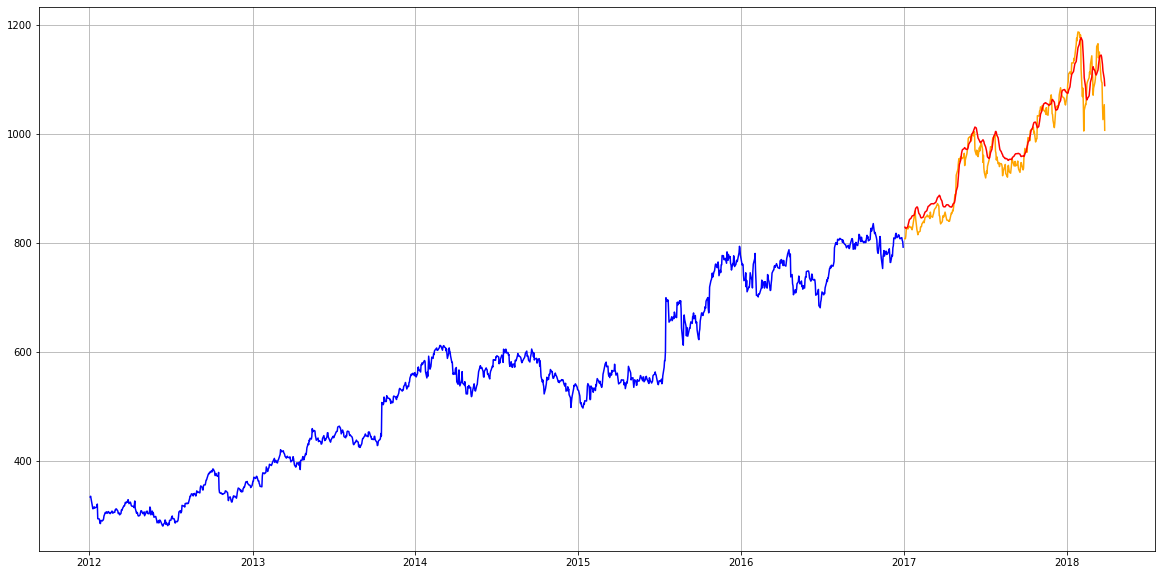

In [56]:
#for plotting

train = new_data_set[new_data_set.index < '2017-01-01']
test = new_data_set[new_data_set.index >= '2017-01-01']
test['Predictions'] = closing_price
plt.figure(figsize = (20,10))
plt.plot(train['Adj. Close'], color = 'blue')
plt.plot(test['Adj. Close'], color = 'orange')
plt.plot(test['Predictions'], color = 'red')
plt.grid(True)
plt.show()
#type(test)
#print(len(test))
#print(len(closing_price))
#print(new_data_set.iloc[960])